In [697]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [698]:
#Read the data in given CSV files into pandas dataframe
appData = pd.read_csv("application_data.csv")
prevApp = pd.read_csv("previous_application.csv")

In [699]:
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',150)

##### DATA STRUCTURE CHECK

In [700]:
#Get information about the data
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [701]:
appData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [702]:
#Row, Column details
appData.shape

(307511, 122)

In [703]:
((appData.isnull().sum(axis=0) / (appData.isnull().sum(axis=0) + appData.count()))*100).round(4)

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


In [704]:
col_with_nan = appData.columns[appData.isnull().any()]
col_with_nan

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [705]:
#Drop columns with more than 50% of null values
for col in col_with_nan:
    if ((appData[col].isnull().sum(axis=0) / (len(appData.index)))*100).round(2) > 50:
        appData.drop(col,1,inplace=True)

In [706]:
#Observe that the number of columns are reduced from 121 to 81
appData.shape

(307511, 81)

In [707]:
#Identifying the continuous and Categorical Columns
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [708]:
#Fetch column list with null values after dropping columns with more than 50% of null values
col_nan = appData.columns[appData.isnull().any()]
col_nan

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [709]:
#Figure all the columns where the missing values is less than 13
cols = appData.columns[(100*(appData.isnull().sum(axis=0)/len(appData.index)))<13]
print(cols)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

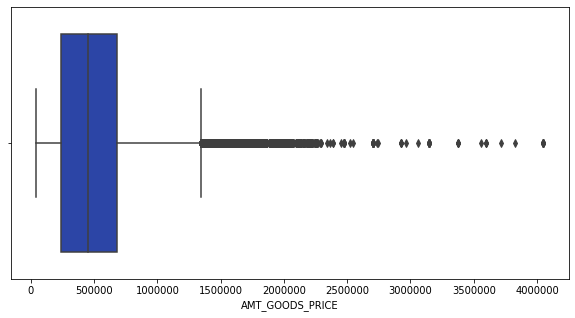

In [710]:
#Observe the outliers for AMT_GOODS_PRICE using boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=appData['AMT_GOODS_PRICE'],color="#1839ba")
#BEST METRIC TO IMPUTE MISSING VALUE => MEDIAN since there are more number of Outliers

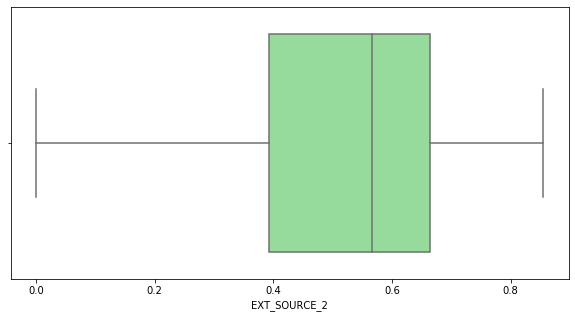

In [711]:
#Observe the outliers for EXT_SOURCE_2 using boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=appData['EXT_SOURCE_2'],color="#8ae691")
#BEST METRIC TO IMPUTE MISSING VALUE => MEAN since there are no outliers

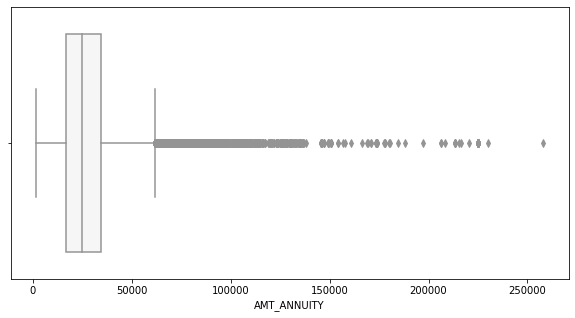

In [712]:
#Observe the outliers for AMT_ANNUITY using boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=appData['AMT_ANNUITY'],color="#f6f6f6")
#BEST METRIC TO IMPUTE missing value => MEDIAN since there are more number of Outliers

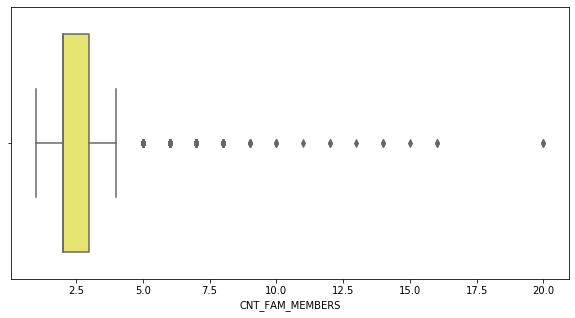

In [713]:
#Observe the outliers for CNT_FAM_MEMBERS using boxplot
plt.figure(figsize = (10,5))
sns.boxplot(x=appData["CNT_FAM_MEMBERS"],color="#f7f75c")
#BEST METRIC TO IMPUTE MISSING VALUE => MEDIAN with some considerable number of outliers

In [714]:
#Observe the outliers for NAME_TYPE_SUITE using boxplot, please note that this is a CATEGORICAL COLUMN
appData["NAME_TYPE_SUITE"].value_counts()
#BEST METRIC TO IMPUTE MISSING VALUE => MODE for categorical variables."Unaccompanied" value can be used to impute.

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [715]:
#Converting negative age to positive age
appData['DAYS_BIRTH'] = abs(appData['DAYS_BIRTH'])
appData['DAYS_EMPLOYED']=abs(appData['DAYS_EMPLOYED'])
appData['DAYS_REGISTRATION'] = abs(appData['DAYS_REGISTRATION'])
appData['DAYS_ID_PUBLISH']=abs(appData['DAYS_ID_PUBLISH'])

In [716]:
#Change data type to datetime
appData['DAYS_BIRTH'] = appData['DAYS_BIRTH']. astype('datetime64[ns]')
appData['DAYS_EMPLOYED'] = appData['DAYS_EMPLOYED']. astype('datetime64[ns]')
appData['DAYS_REGISTRATION'] = appData['DAYS_REGISTRATION']. astype('datetime64[ns]')
appData['DAYS_ID_PUBLISH'] = appData['DAYS_ID_PUBLISH']. astype('datetime64[ns]')

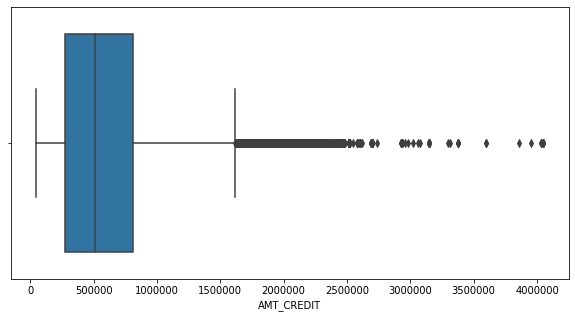

In [717]:
#Observe Outliers for numeric column for atleast 5 variables
#Variable 1
plt.figure(figsize=(10,5))
sns.boxplot(x=appData['AMT_CREDIT'])

###### Observation : The most frquent amount credited by the bank lies around 500000  ± 200000. There are some significant high figures 1700000 which scares down to 4000000

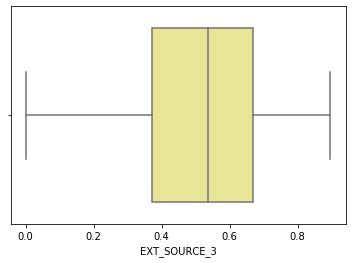

In [718]:
#Variable 2
sns.boxplot(x=appData['EXT_SOURCE_3'],color="#f5f189")

###### Observation : Normalized score from external data source has fixed placement with no outliers observed. Median is an ideal metric to impute missing values.

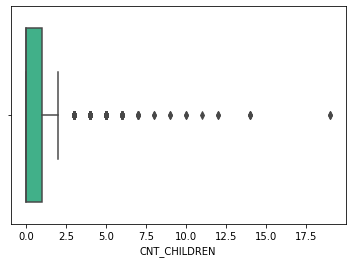

In [719]:
#Variable 3
sns.boxplot(x=appData['CNT_CHILDREN'],color="#2fc28e")

###### Observation : The count of children a client has is essentially 0 or 1 with some exceptions to distinctly high numbers

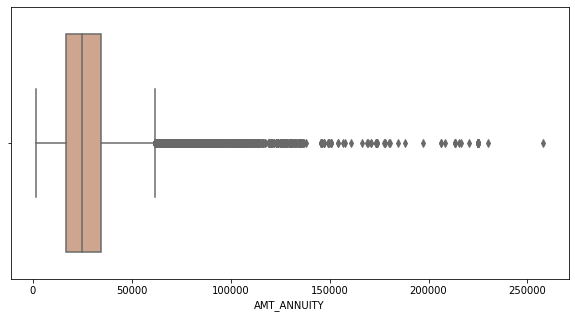

In [720]:
#Variable 4
plt.figure(figsize=(10,5))
sns.boxplot(x=appData['AMT_ANNUITY'],color="#d9a384")

###### Observation :  The payment made at intervals lies within 40000 with extreme exceptions above 60000 uptil 250000

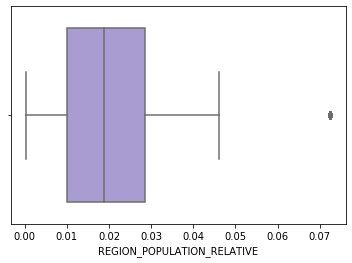

In [721]:
#Variable 5
sns.boxplot(x=appData['REGION_POPULATION_RELATIVE'],color="#a593d9")

###### Observation :  Population of region where client lives has density between 0.01 and 0.03 with an exceptional outlier.

### BINNING OF CONTINUOUS VARIABLE

In [722]:
bins = [45000,500000,1000000,1500000,2000000,2500000,3000000,3500000,4050000]
labels = ["45000-500000","500000-1000000","1000000-1500000","1500000-2000000","2000000-2500000","2500000-3000000","3000000-3500000","3500000-4050000"]
appData['CATEGORICAL_AMT_CREDIT'] = pd.cut(appData['AMT_CREDIT'],bins,labels = labels)

In [723]:
appData['CATEGORICAL_AMT_CREDIT']

0            45000-500000
1         1000000-1500000
2            45000-500000
3            45000-500000
4          500000-1000000
               ...       
307506       45000-500000
307507       45000-500000
307508     500000-1000000
307509       45000-500000
307510     500000-1000000
Name: CATEGORICAL_AMT_CREDIT, Length: 307511, dtype: category
Categories (8, object): [45000-500000 < 500000-1000000 < 1000000-1500000 < 1500000-2000000 < 2000000-2500000 < 2500000-3000000 < 3000000-3500000 < 3500000-4050000]

In [724]:
bins = [1615.5,10000,50000,100000,200000,258025]
labels = ["low","medium","high","very high","extremely high"]
appData['CATEGORY_AMT_ANNUITY'] = pd.cut(appData['AMT_ANNUITY'],bins,labels = labels)

#### DIVIDE DATA INTO TWO SETS - TARGET 0 and TARGET 1

In [725]:
appData['TARGET'].value_counts(normalize = True) * 100
#PERCENTAGE OF ROW WITH TARGET 0 => 91.93%
#PERCENTAGE OF ROW WITH TARGET 1 => 8.07%

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [726]:
#Data set divided into two sets
#Target = 0
appData0 = appData[appData['TARGET'] == 0]
#Target=1
appData1 = appData[appData['TARGET'] == 1]

In [727]:
appData0['TARGET'].value_counts(normalize = True)

0    1.0
Name: TARGET, dtype: float64

In [728]:
appData1['TARGET'].value_counts(normalize = True)

1    1.0
Name: TARGET, dtype: float64

#### UNIVARIARIATE ANALYSIS

###### CATEGORICAL VARIABLES with respect to TARGET

In [729]:
#Figure out categorical variables in appData
appData.dtypes[appData.dtypes == "object"]

NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
EMERGENCYSTATE_MODE           object
dtype: object

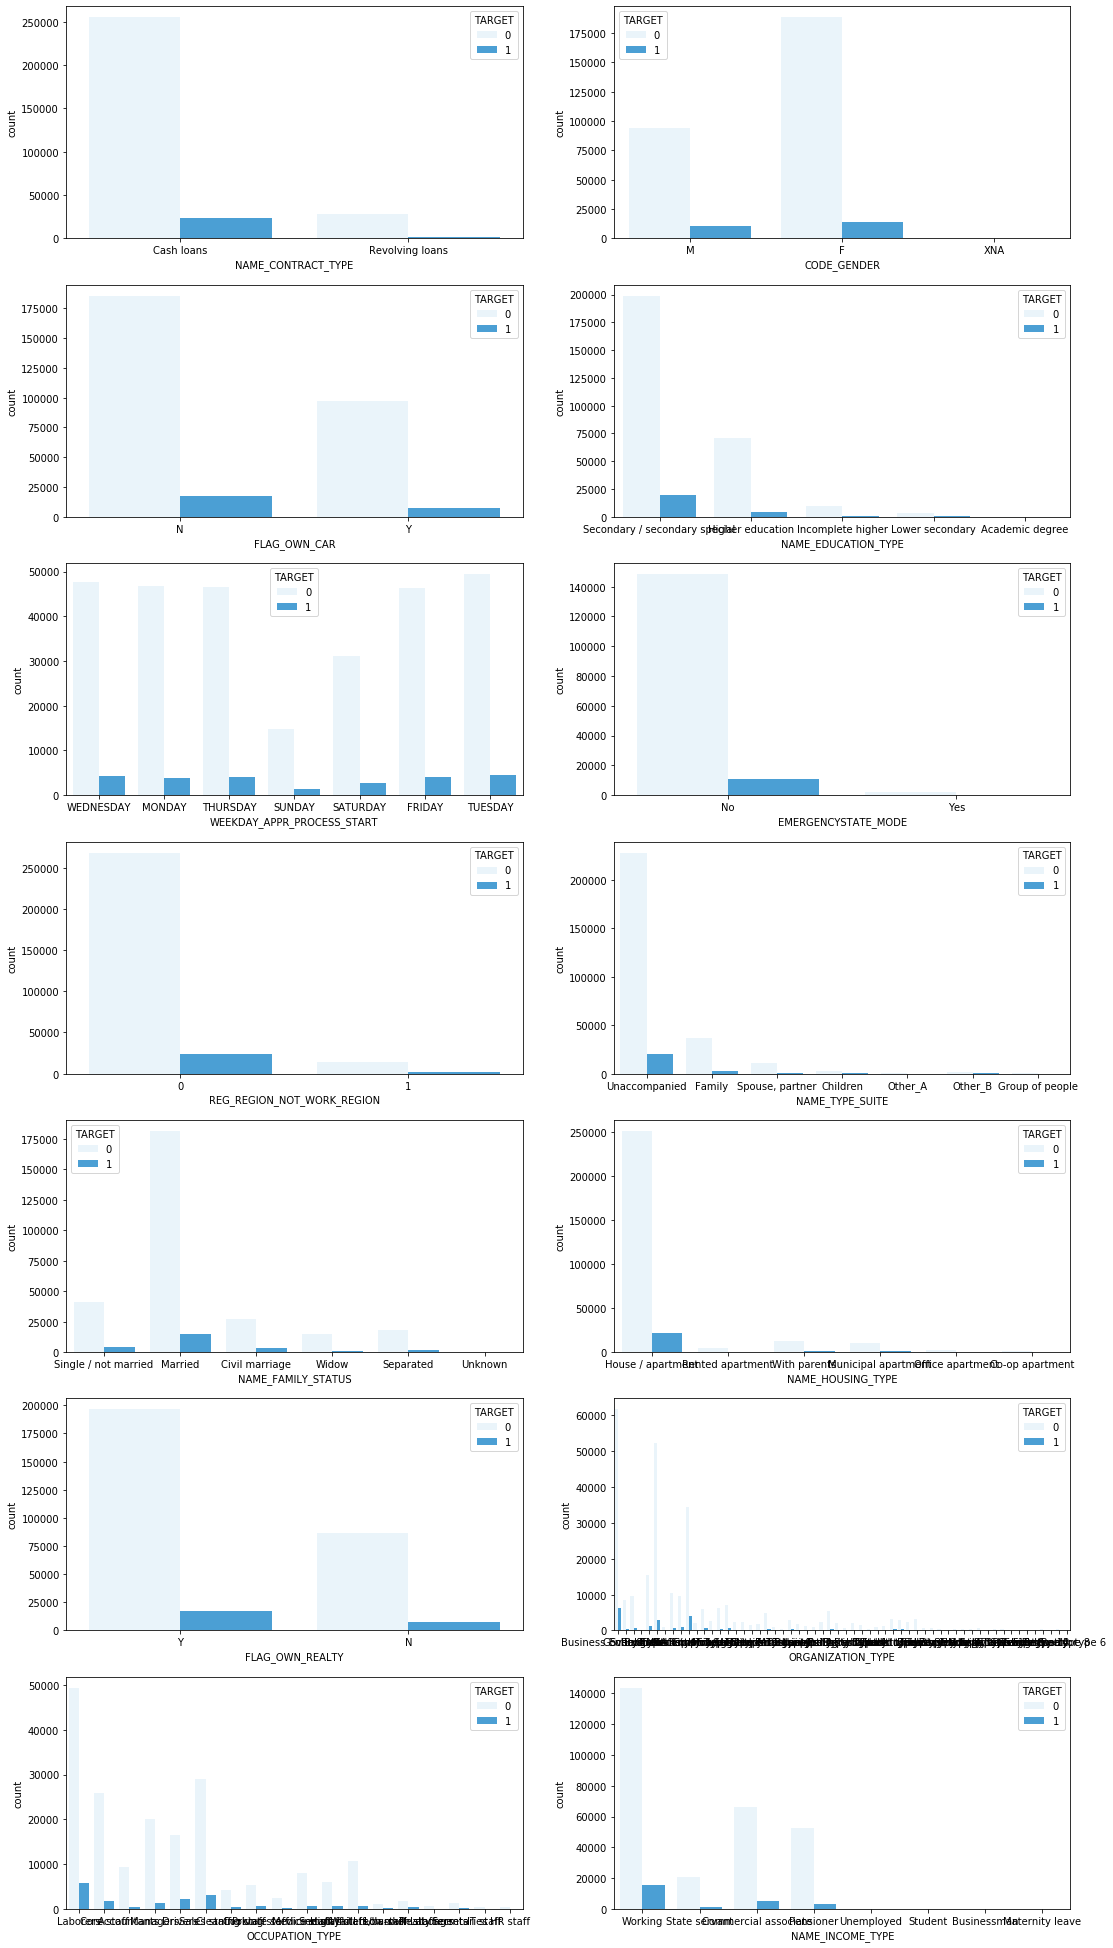

In [730]:
features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START','EMERGENCYSTATE_MODE','REG_REGION_NOT_WORK_REGION','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_OWN_REALTY','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
plt.figure(figsize = (18,35))
for i in enumerate(features):
    plt.subplot(7,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=appData,color="#34a4eb")

#### OBSERVATIONS

<b>> </b>The demand of Cash Loan is higher than Revolving Loan. Undoubtedly, the count of clients with payment difficulty is way lower than other cases for Cash Loan.<br>
<b>> </b> The no of loan applicants from the Female clients is higher as compared to the Males ,  the males  also have lower percentage of payment difficulty than females.<br>
<b>> </b> The no of applications from the Clients is high for non owners, the defaulters are less for the clients who own cars.<br>
<b>> </b> An exceeding number of clients walked in with loan application unaccompanied and they have payment difficulty than those who came with family/spouse/children.<br>
<b>> </b> Married folks have maximum number of  loan applications, they don’t have payment difficulty as opposed to single/separated or clients involved in Civil Marriage.<br>
<b>> </b> Clients with property of their own have higher rate of loan applications, also they don’t posses any difficulty in repayment.

In [731]:
#Figure out continuous variables in appData
appData.dtypes[appData.dtypes != "object"]

SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
AMT_ANNUITY                            float64
AMT_GOODS_PRICE                        float64
REGION_POPULATION_RELATIVE             float64
DAYS_BIRTH                      datetime64[ns]
DAYS_EMPLOYED                   datetime64[ns]
DAYS_REGISTRATION               datetime64[ns]
DAYS_ID_PUBLISH                 datetime64[ns]
FLAG_MOBIL                               int64
FLAG_EMP_PHONE                           int64
FLAG_WORK_PHONE                          int64
FLAG_CONT_MOBILE                         int64
FLAG_PHONE                               int64
FLAG_EMAIL                               int64
CNT_FAM_MEMBERS                        float64
REGION_RATING_CLIENT                     int64
REGION_RATING_CLIENT_W_CITY              int64
HOUR_APPR_PRO

###### CONTINUOUS COLUMNS with respect to TARGET

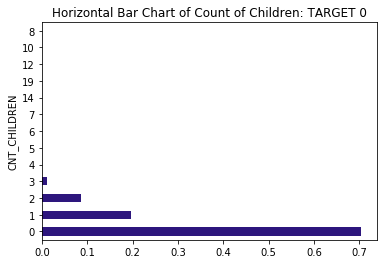

In [732]:
plt.ylabel('CNT_CHILDREN')
plt.title('Horizontal Bar Chart of Count of Children: TARGET 0')
appData0.CNT_CHILDREN.value_counts(normalize=True).plot.barh(color="#2d167d")# Target = 0

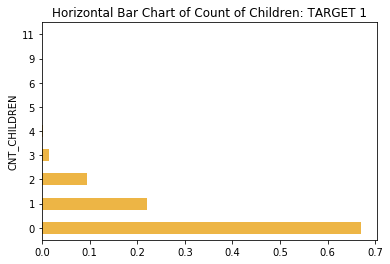

In [733]:
plt.ylabel('CNT_CHILDREN')
plt.title('Horizontal Bar Chart of Count of Children: TARGET 1')
appData1.CNT_CHILDREN.value_counts(normalize=True).plot.barh(color="#edb545")# Target = 1

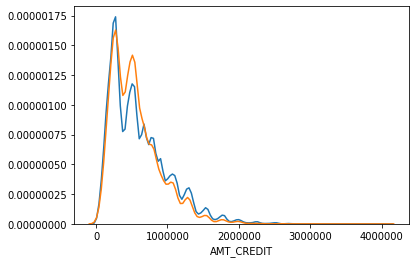

In [734]:
sns.distplot(appData0['AMT_CREDIT'], hist = False)# Target = 0
sns.distplot(appData1['AMT_CREDIT'], hist = False)# Target = 1

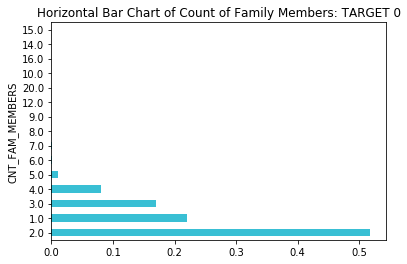

In [735]:
plt.ylabel('CNT_FAM_MEMBERS')
plt.title('Horizontal Bar Chart of Count of Family Members: TARGET 0')
appData0.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.barh(color="#39bfd4")# Target = 0

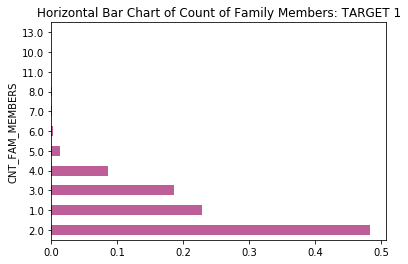

In [736]:
plt.ylabel('CNT_FAM_MEMBERS')
plt.title('Horizontal Bar Chart of Count of Family Members: TARGET 1')
appData1.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.barh(color="#bd5e99")# Target = 1

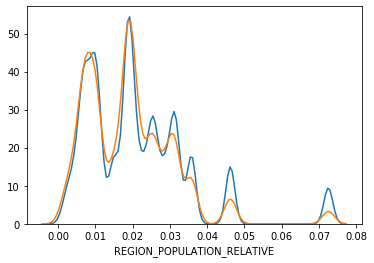

In [737]:
sns.distplot(appData0['REGION_POPULATION_RELATIVE'],hist=False)# Target = 0
sns.distplot(appData1['REGION_POPULATION_RELATIVE'],hist=False)# Target = 1

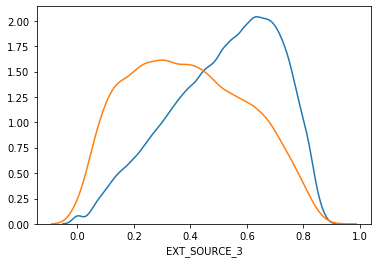

In [738]:
sns.distplot(appData0['EXT_SOURCE_3'],hist=False)# Target = 0
sns.distplot(appData1['EXT_SOURCE_3'],hist=False)# Target = 1

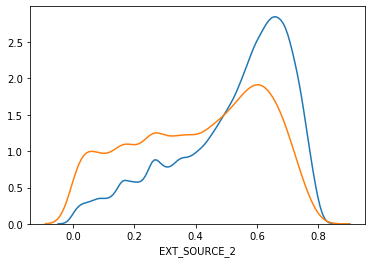

In [739]:
sns.distplot(appData0['EXT_SOURCE_2'],hist=False)# Target = 0
sns.distplot(appData1['EXT_SOURCE_2'],hist=False)# Target = 1

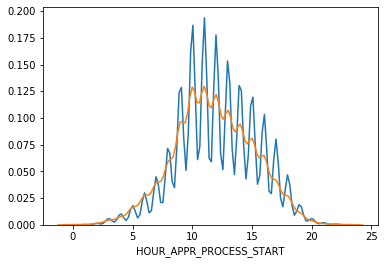

In [740]:
sns.distplot(appData0['HOUR_APPR_PROCESS_START'],hist=False)# Target = 0
sns.distplot(appData1['HOUR_APPR_PROCESS_START'],hist=False)# Target = 1

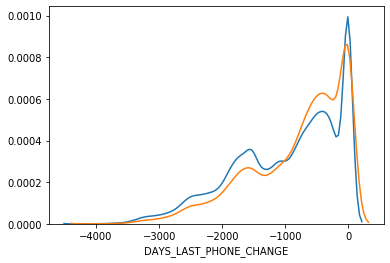

In [741]:
sns.distplot(appData0['DAYS_LAST_PHONE_CHANGE'],hist=False)# Target = 0
sns.distplot(appData1['DAYS_LAST_PHONE_CHANGE'],hist=False)# Target = 1

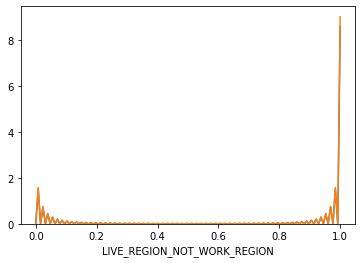

In [742]:
sns.distplot(appData0['LIVE_REGION_NOT_WORK_REGION'],hist=False)# Target = 0
sns.distplot(appData1['LIVE_REGION_NOT_WORK_REGION'],hist=False)# Target = 1

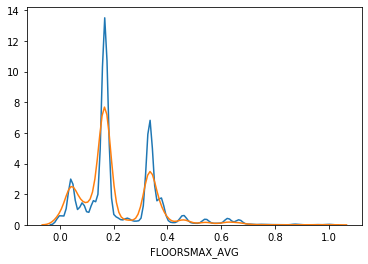

In [743]:
sns.distplot(appData0['FLOORSMAX_AVG'],hist=False)# Target = 0
sns.distplot(appData1['FLOORSMAX_AVG'],hist=False)# Target = 1

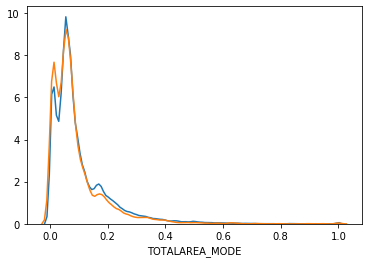

In [744]:
sns.distplot(appData0['TOTALAREA_MODE'],hist=False)# Target = 0
sns.distplot(appData1['TOTALAREA_MODE'],hist=False)# Target = 1

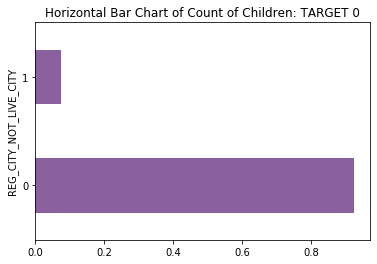

In [745]:
plt.ylabel('REG_CITY_NOT_LIVE_CITY')
plt.title('Horizontal Bar Chart of Count of Children: TARGET 0')
appData0.REG_CITY_NOT_LIVE_CITY.value_counts(normalize=True).plot.barh(color="#8a609e")# Target = 0

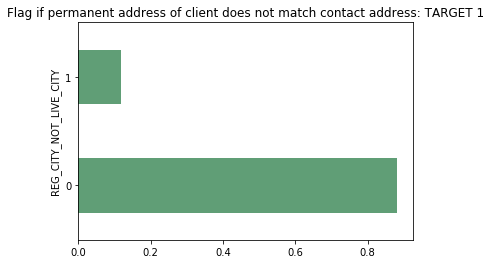

In [746]:
plt.ylabel('REG_CITY_NOT_LIVE_CITY')
plt.title('Flag if permanent address of client does not match contact address: TARGET 1')
appData1.REG_CITY_NOT_LIVE_CITY.value_counts(normalize=True).plot.barh(color="#609e76")# Target = 1

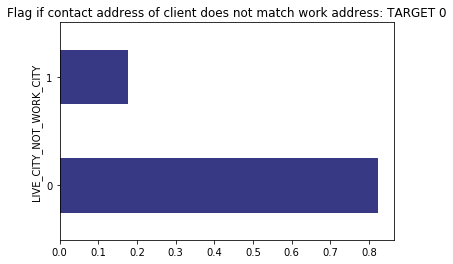

In [747]:
plt.ylabel('LIVE_CITY_NOT_WORK_CITY')
plt.title('Flag if contact address of client does not match work address: TARGET 0')
appData0.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.barh(color="#383985")# Target = 0

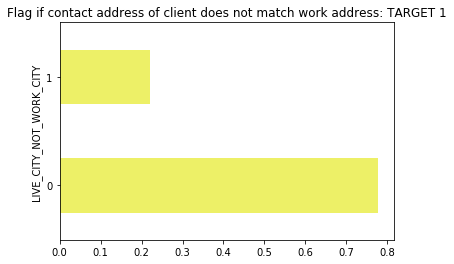

In [748]:
plt.ylabel('LIVE_CITY_NOT_WORK_CITY')
plt.title('Flag if contact address of client does not match work address: TARGET 1')
appData1.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.barh(color="#edf067")# Target = 1

#### OBSERVATIONS

<b>> </b> Count of family members ranges from 2 to 5 and the frequency of clients with 2 family member is highest for both Target 0 and 1, however slightly more in Target 0.<br>
<b>> </b> Frequency of Children count ranging from 0 to 3 remains significantly same for both Target 0 and 1.<br>
Credit amount of the loan for both Target 0 and 1 grows and falls in similar fashion with slightly higher value for Target 1 under 1000000.<br>
<b>> </b> Normalized value of External Sources rise higher for Target 0 for both EXT_SOURCE_2 and EXT_SOURCE_3.<br>
<b>> </b> Following parameters DO NOT show drastic behavior change across Target 0 and 1:<br>
-LIVE_CITY_NOT_WORK_CITY<br>
-REG_CITY_NOT_LIVE_CITY<br>
-TOTALAREA_MODE<br>
-DAYS_LAST_PHONE_CHANGE<br>
-REGION_POPULATION_RELATIVE<br>

#### BIVARIATE ANALYSIS

###### CATEGORICAL COLUMNS with respect to TARGET

NAME_TYPE_SUITE
Children             241
Family              3009
Group of people       23
Other_A               76
Other_B              174
Spouse, partner      895
Unaccompanied      20337
Name: TARGET, dtype: int64

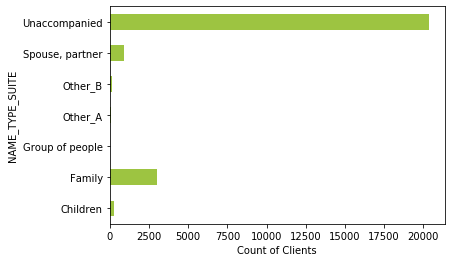

In [749]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_TYPE_SUITE'])['TARGET'].sum().plot.barh(color="#9dc441")
appData.groupby('NAME_TYPE_SUITE')['TARGET'].sum()

In [750]:
appData.groupby('NAME_TYPE_SUITE')['TARGET'].mean()

NAME_TYPE_SUITE
Children           0.073768
Family             0.074946
Group of people    0.084871
Other_A            0.087760
Other_B            0.098305
Spouse, partner    0.078716
Unaccompanied      0.081830
Name: TARGET, dtype: float64

NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: TARGET, dtype: int64

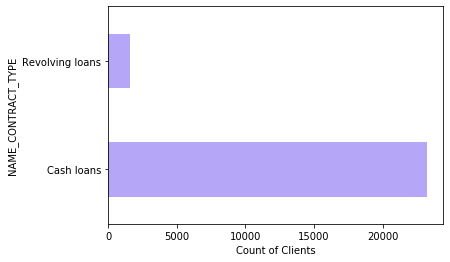

In [751]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].sum().plot.barh(color="#b6a6f7")
appData.groupby('NAME_CONTRACT_TYPE')['TARGET'].sum()

In [752]:
appData.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64

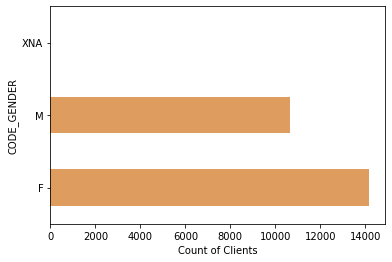

In [753]:
plt.xlabel("Count of Clients")
appData.groupby(['CODE_GENDER'])['TARGET'].sum().plot.barh(color="#de9d5f")
appData.groupby('CODE_GENDER')['TARGET'].sum()

In [754]:
appData.groupby('CODE_GENDER')['TARGET'].mean()

CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64

FLAG_OWN_CAR
N    17249
Y     7576
Name: TARGET, dtype: int64

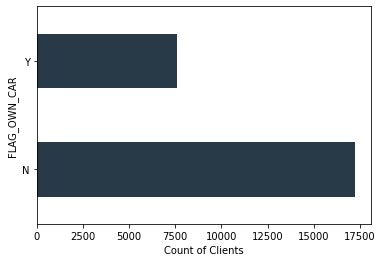

In [755]:
plt.xlabel("Count of Clients")
appData.groupby(['FLAG_OWN_CAR'])['TARGET'].sum().plot.barh(color="#283a47")
appData.groupby('FLAG_OWN_CAR')['TARGET'].sum()

In [756]:
appData.groupby('FLAG_OWN_CAR')['TARGET'].mean()

FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64

FLAG_OWN_REALTY
N     7842
Y    16983
Name: TARGET, dtype: int64

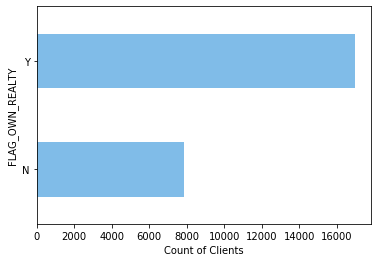

In [757]:
plt.xlabel("Count of Clients")
appData.groupby(['FLAG_OWN_REALTY'])['TARGET'].sum().plot.barh(color="#80bce8")
appData.groupby('FLAG_OWN_REALTY')['TARGET'].sum()

In [758]:
appData.groupby('FLAG_OWN_REALTY')['TARGET'].mean()

FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64

NAME_FAMILY_STATUS
Civil marriage           2961
Married                 14850
Separated                1620
Single / not married     4457
Unknown                     0
Widow                     937
Name: TARGET, dtype: int64

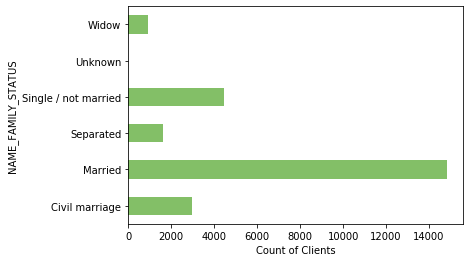

In [759]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_FAMILY_STATUS'])['TARGET'].sum().plot.barh(color="#83bf67")
appData.groupby('NAME_FAMILY_STATUS')['TARGET'].sum()

In [760]:
appData.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64

EMERGENCYSTATE_MODE
No     11104
Yes      223
Name: TARGET, dtype: int64

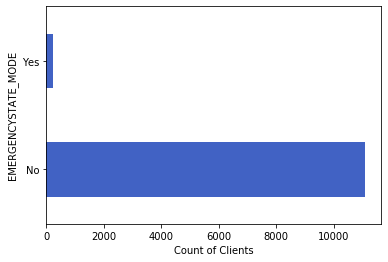

In [761]:
plt.xlabel("Count of Clients")
appData.groupby(['EMERGENCYSTATE_MODE'])['TARGET'].sum().plot.barh(color="#4162c4")
appData.groupby('EMERGENCYSTATE_MODE')['TARGET'].sum()

In [762]:
appData.groupby('EMERGENCYSTATE_MODE')['TARGET'].mean()

EMERGENCYSTATE_MODE
No     0.069649
Yes    0.095790
Name: TARGET, dtype: float64

NAME_INCOME_TYPE
Businessman                 0
Commercial associate     5360
Maternity leave             2
Pensioner                2982
State servant            1249
Student                     0
Unemployed                  8
Working                 15224
Name: TARGET, dtype: int64

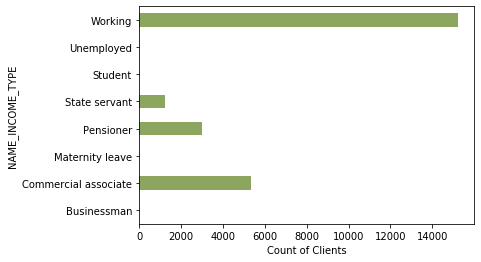

In [763]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_INCOME_TYPE'])['TARGET'].sum().plot.barh(color="#8ca660")
appData.groupby('NAME_INCOME_TYPE')['TARGET'].sum()

In [764]:
appData.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

NAME_EDUCATION_TYPE
Academic degree                      3
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Secondary / secondary special    19524
Name: TARGET, dtype: int64

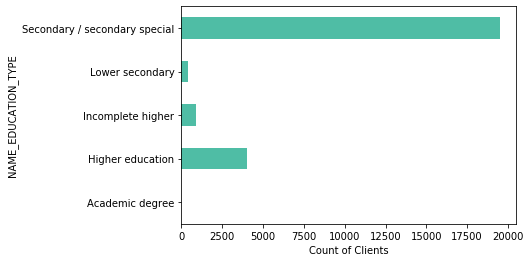

In [765]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].sum().plot.barh(color="#4fbda5")
appData.groupby('NAME_EDUCATION_TYPE')['TARGET'].sum()

In [766]:
appData.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

OCCUPATION_TYPE
Accountants               474
Cleaning staff            447
Cooking staff             621
Core staff               1738
Drivers                  2107
HR staff                   36
High skill tech staff     701
IT staff                   34
Laborers                 5838
Low-skill Laborers        359
Managers                 1328
Medicine staff            572
Private service staff     175
Realty agents              59
Sales staff              3092
Secretaries                92
Security staff            722
Waiters/barmen staff      152
Name: TARGET, dtype: int64

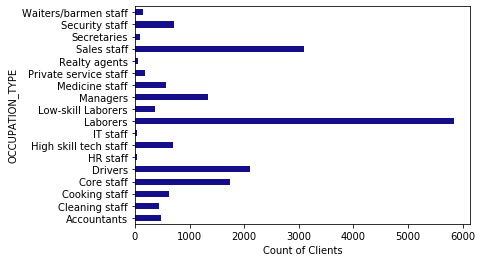

In [767]:
plt.xlabel("Count of Clients")
appData.groupby(['OCCUPATION_TYPE'])['TARGET'].sum().plot.barh(color="#140e8a")
appData.groupby('OCCUPATION_TYPE')['TARGET'].sum()

In [768]:
appData.groupby('OCCUPATION_TYPE')['TARGET'].mean()

OCCUPATION_TYPE
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105788
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067002
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

NAME_HOUSING_TYPE
Co-op apartment           89
House / apartment      21272
Municipal apartment      955
Office apartment         172
Rented apartment         601
With parents            1736
Name: TARGET, dtype: int64

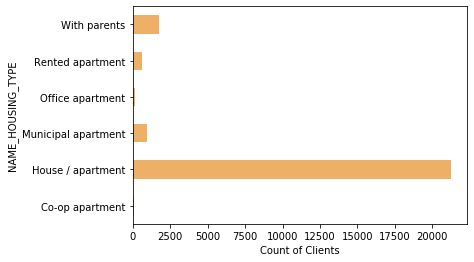

In [769]:
plt.xlabel("Count of Clients")
appData.groupby(['NAME_HOUSING_TYPE'])['TARGET'].sum().plot.barh(color="#edb066")
appData.groupby('NAME_HOUSING_TYPE')['TARGET'].sum()

In [770]:
appData.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()

NAME_HOUSING_TYPE
Co-op apartment        0.079323
House / apartment      0.077957
Municipal apartment    0.085397
Office apartment       0.065724
Rented apartment       0.123131
With parents           0.116981
Name: TARGET, dtype: float64

#### OBSERVATIONS

<b>> </b>Based on previous observation, clients who walked in unaccompanied have lower payment difficulty relative to other NAME_TYPE_SUITE, these clients have significantly lower number of Target 1 cases as well.<br>
<b>> </b>Not only the demand of cash loan is lower as observed in previous analysis, but the Target 1 count is also less for cash loan than revolving loan.<br>
 <b>> </b>As observed in univariate analysis also, female clients have relatively better rate in Target 0 bucket than male clients.<br>
<b>> </b>Clients owning car have lesser number of Target 0 cases than who do not have car. However from previous analysis, the count of the loan application and Target 1 cases is way higher for non car owners.<br>
<b>> </b>Married clients have higher number of loan applications, more tendency to fall into Target 0 and Target 1 bucket relative to other NAME_FAMILY_STATUS. The Target 1 buckets is approximately three times higher for Married clients. This hypothesis holds true for NAME_INCOME_TYPE also.<br>
<b>> </b>Secondary/secondary special Education Type has leading count in Target 1 bucket followed by Higher Education.
Laborers have a considerably prominent count to fall in Target 1 group followed by Sales Staff, Drivers, Core Staff and Managers.

###### CONTINUOUS COLUMN with respect to TARGET

In [771]:
appData.groupby("TARGET")["AMT_CREDIT"].mean()

TARGET
0    602648.282002
1    557778.527674
Name: AMT_CREDIT, dtype: float64

In [772]:
appData.groupby("TARGET")["AMT_CREDIT"].median()

TARGET
0    517788.0
1    497520.0
Name: AMT_CREDIT, dtype: float64

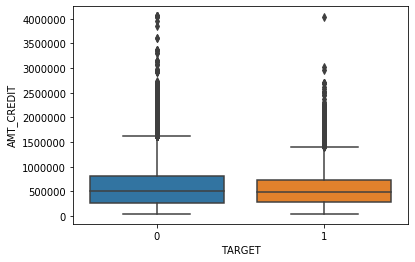

In [773]:
sns.boxplot(data=appData, x= "TARGET",y = "AMT_CREDIT")

In [774]:
appData.groupby("TARGET")["AMT_ANNUITY"].mean()

TARGET
0    27163.623349
1    26481.744290
Name: AMT_ANNUITY, dtype: float64

In [775]:
appData.groupby("TARGET")["AMT_ANNUITY"].median()

TARGET
0    24876.0
1    25263.0
Name: AMT_ANNUITY, dtype: float64

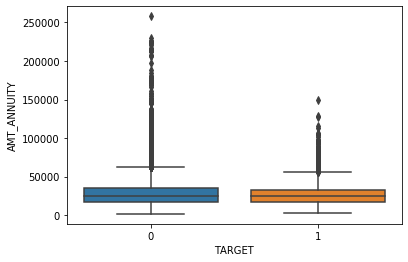

In [776]:
sns.boxplot(data=appData, x= "TARGET",y = "AMT_ANNUITY")

In [777]:
appData.groupby("TARGET")["AMT_GOODS_PRICE"].mean()

TARGET
0    542736.795003
1    488972.412554
Name: AMT_GOODS_PRICE, dtype: float64

In [778]:
appData.groupby("TARGET")["AMT_GOODS_PRICE"].median()

TARGET
0    450000.0
1    450000.0
Name: AMT_GOODS_PRICE, dtype: float64

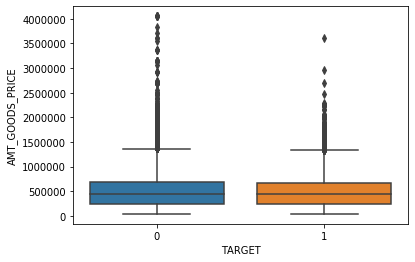

In [779]:
sns.boxplot(data=appData,x="TARGET",y="AMT_GOODS_PRICE")

In [780]:
appData.groupby("TARGET")["CNT_CHILDREN"].mean()

TARGET
0    0.412946
1    0.463807
Name: CNT_CHILDREN, dtype: float64

In [781]:
appData.groupby("TARGET")["CNT_CHILDREN"].median()

TARGET
0    0
1    0
Name: CNT_CHILDREN, dtype: int64

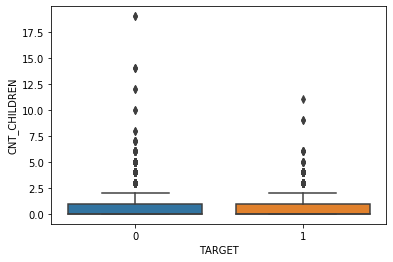

In [782]:
sns.boxplot(data=appData,x="TARGET",y="CNT_CHILDREN")

In [783]:
appData.groupby("TARGET")["CNT_FAM_MEMBERS"].mean() 

TARGET
0    2.150154
1    2.181269
Name: CNT_FAM_MEMBERS, dtype: float64

In [784]:
appData.groupby("TARGET")["CNT_FAM_MEMBERS"].median()

TARGET
0    2.0
1    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

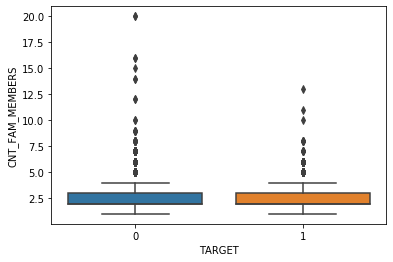

In [785]:
sns.boxplot(data=appData,x="TARGET",y="CNT_FAM_MEMBERS")

#### CORRELATION

###### CORRELATION OF DATASET WITH TARGET = 0

In [786]:
#Generating dataframe to define correlation between two columns
corr0 = appData0.corr()

In [787]:
corr0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))

In [788]:
corr0_df = corr0.unstack().reset_index()

In [789]:
corr0_df.columns =['VAR1','VAR2','CORRELATION']

In [790]:
corr0_df.head()

,VAR1,VAR2,CORRELATION
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [791]:
#Drop column with null values
corr0_df.dropna(subset=['CORRELATION'],inplace=True)

In [858]:
corr0_df['CORRELATION'] = round(corr0_df['CORRELATION'],2)

In [859]:
corr0_df['CORRELATION'] = abs(corr0_df['CORRELATION'])

In [860]:
corr0_df.sort_values(by='CORRELATION',ascending=False).head(10)

,VAR1,VAR2,CORRELATION
2011,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
2273,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
2013,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
1946,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
1883,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
388,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1818,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
1948,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
1039,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
898,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


###### CORRELATION OF DATASET WITH TARGET = 1

In [795]:
corr1 = appData1.corr()

In [796]:
corr1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(bool))

In [797]:
corr1_df = corr1.unstack().reset_index()

In [798]:
corr1_df.columns = ['VAR1','VAR2','CORRELATION']

In [799]:
corr1_df.dropna(subset=['CORRELATION'],inplace = True)

In [800]:
corr1_df['CORRELATION'] = abs(round(corr1_df['CORRELATION'],2))

In [861]:
corr1_df.sort_values(by = 'CORRELATION',ascending = False).head(10)

,VAR1,VAR2,CORRELATION
1946,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
2011,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
2273,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
2013,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
1883,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
388,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1948,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
1818,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
1039,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
898,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89


#### OBSERVATIONS

#### VARIABLES WITH HIGHEST CORRELATION FOR TARGET 0

<b>1.</b> FLOORSMAX_MEDI & FLOORSMAX_AVG<br>
<b>2.</b> OBS_60_CNT_SOCIAL_CIRCLE & OBS_30_CNT_SOCIAL_CIRCLE<br>
<b>4.</b> FLOORSMAX_MEDI & FLOORSMAX_MODE<br>
<b>3.</b> YEARS_BEGINEXPLUATATION_MEDI & YEARS_BEGINEXPLUATATION_AVG<br>
<b>5.</b> FLOORSMAX_MODE & FLOORSMAX_AVG<br>
<b>6.</b> AMT_GOODS_PRICE & AMT_CREDIT<br>
<b>7.</b> YEARS_BEGINEXPLUATATION_MODE & YEARS_BEGINEXPLUATATION_AVG<br>
<b>8.</b> YEARS_BEGINEXPLUATATION_MEDI & YEARS_BEGINEXPLUATATION_MODE<br>
<b>9.</b> REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT<br>
<b>10.</b> CNT_FAM_MEMBERS & CNT_CHILDREN<br>

#### VARIABLES WITH HIGHEST CORRELATION FOR TARGET 1

<b>1.</b> YEARS_BEGINEXPLUATATION_MEDI & YEARS_BEGINEXPLUATATION_AVG<br>
<b>2.</b> FLOORSMAX_MEDI & FLOORSMAX_AVG<br>
<b>3.</b> OBS_60_CNT_SOCIAL_CIRCLE & OBS_30_CNT_SOCIAL_CIRCLE<br>
<b>4.</b> FLOORSMAX_MEDI & FLOORSMAX_MODE<br>
<b>5.</b> FLOORSMAX_MODE & FLOORSMAX_AVG<br>
<b>6.</b> AMT_GOODS_PRICE & AMT_CREDIT<br>
<b>7.</b> YEARS_BEGINEXPLUATATION_MEDI & YEARS_BEGINEXPLUATATION_MODE<br>
<b>8.</b> YEARS_BEGINEXPLUATATION_MODE & YEARS_BEGINEXPLUATATION_AVG<br>
<b>9.</b> REGION_RATING_CLIENT_W_CITY & REGION_RATING_CLIENT<br>
<b>10.</b> CNT_FAM_MEMBERS & CNT_CHILDREN<br>


#### Merge "Previous Application Data" and "Application Data"

In [802]:
mergedAppData = pd.merge(appData, prevApp, on=["SK_ID_CURR"],how='inner')

In [803]:
mergedAppData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CATEGORICAL_AMT_CREDIT,CATEGORY_AMT_ANNUITY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1970-01-01 00:00:00.000009461,1970-01-01 00:00:00.000000637,1970-01-01 00:00:00.000003648,1970-01-01 00:00:00.000002120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,45000-500000,medium,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1970-01-01 00:00:00.000016765,1970-01-01 00:00:00.000001188,1970-01-01 00:00:00.000001186,1970-01-01 00:00:00.000000291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000000-1500000,medium,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1970-01-01 00:00:00.000016765,1970-01-01 00:00:00.000001188,1970-01

In [804]:
mergedAppData.shape

(1413701, 119)

#### UNIVARIATE ANALYSIS

In [805]:
#Data set divided into two sets
#NAME_CONTRACT_STATUS = Approved
appDataApproved = mergedAppData[mergedAppData['NAME_CONTRACT_STATUS'] == 'Approved']
#NAME_CONTRACT_STATUS = REFUSED
appDataRefused = mergedAppData[mergedAppData['NAME_CONTRACT_STATUS'] == 'Refused']
#NAME_CONTRACT_STATUS = CANCELED
appDataCanceled = mergedAppData[mergedAppData['NAME_CONTRACT_STATUS'] == 'Canceled']
#NAME_CONTRACT_STATUS = UNUSED OFFER
appDataUnusedOffer = mergedAppData[mergedAppData['NAME_CONTRACT_STATUS'] == 'Unused offer']

###### CATEGORICAL COLUMNS WITH RESPECT TO NAME_CONTRACT_STATUS

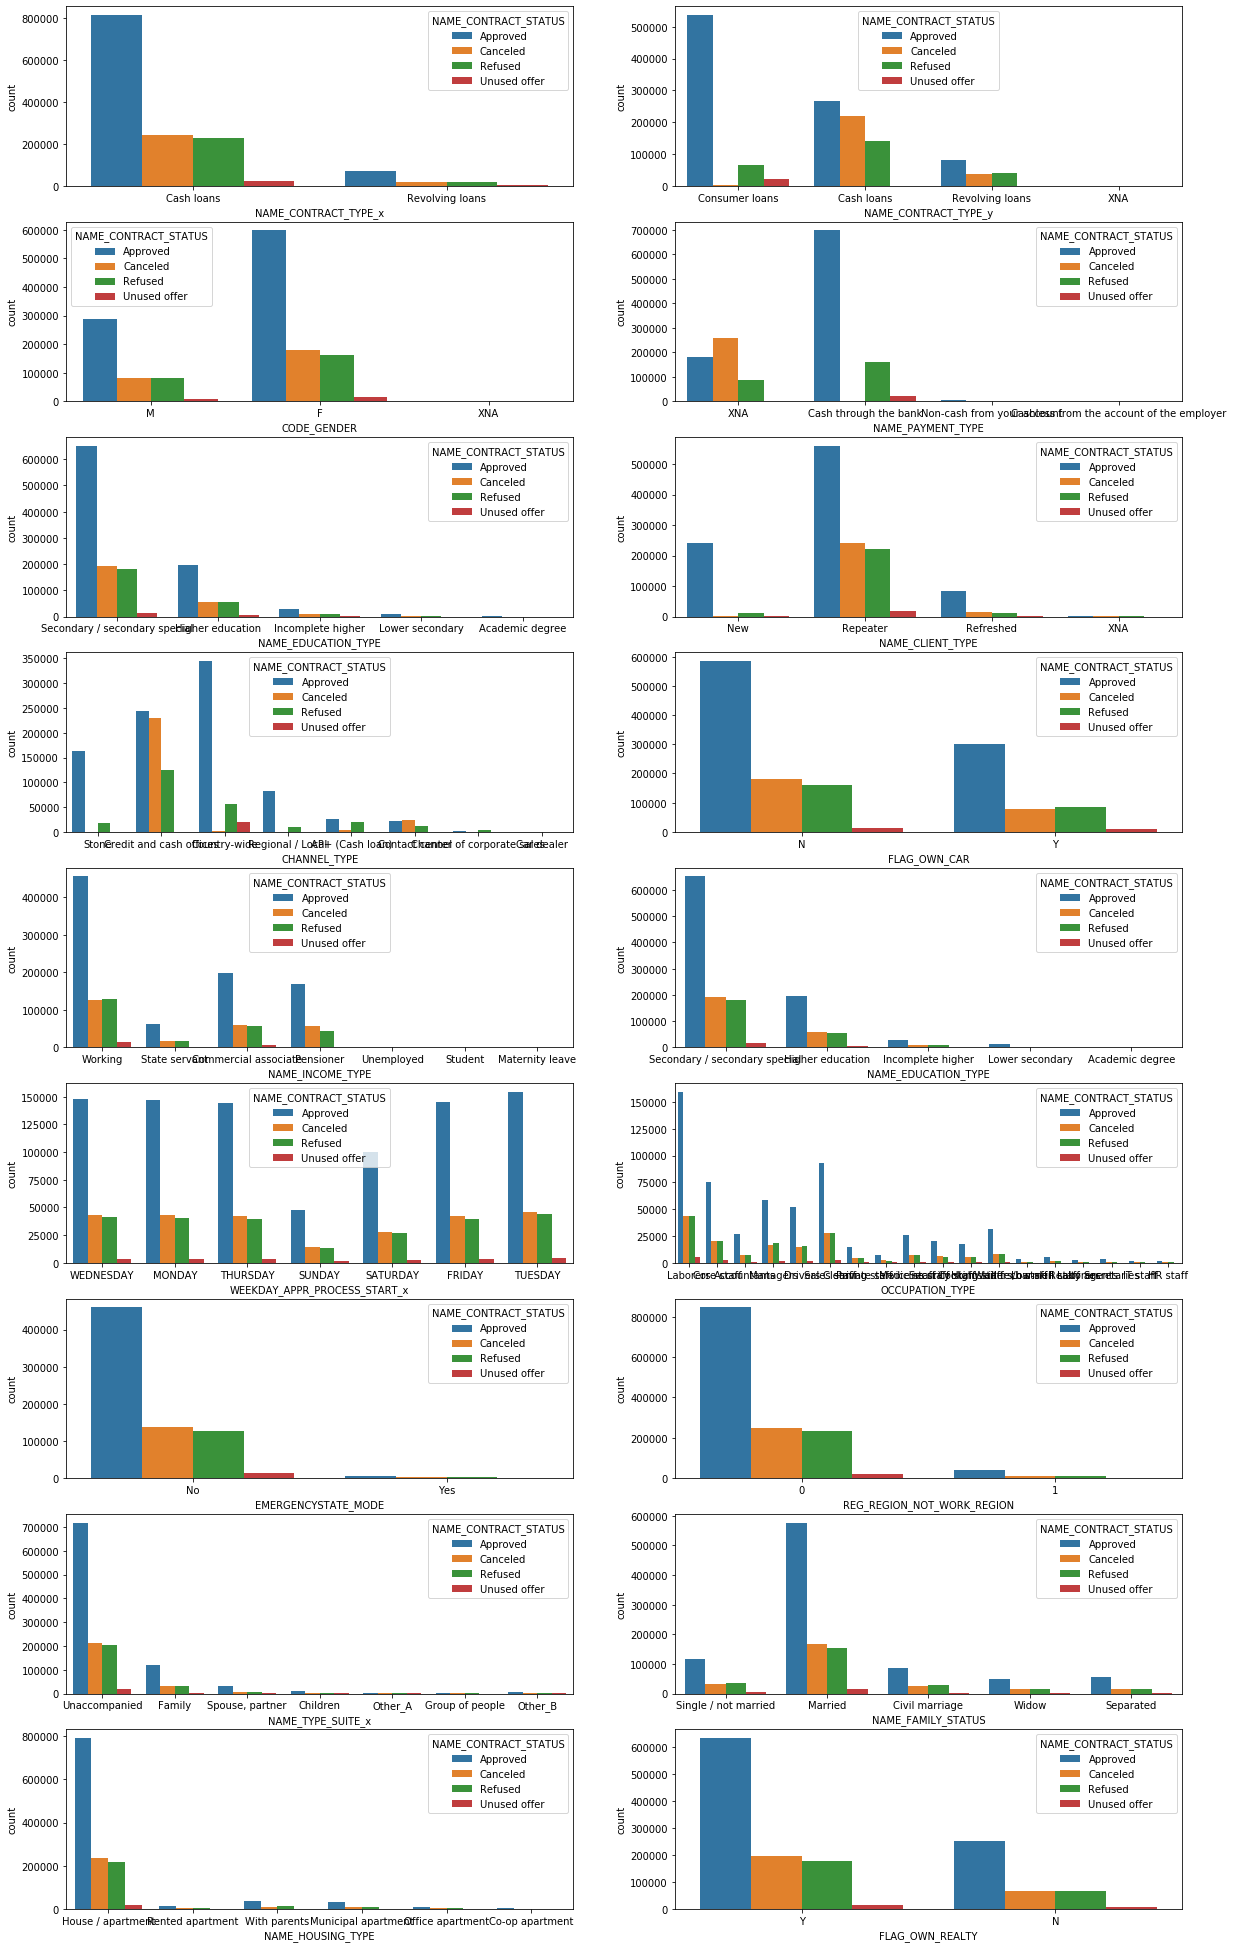

In [806]:
features = ['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y','CODE_GENDER','NAME_PAYMENT_TYPE','NAME_EDUCATION_TYPE','NAME_CLIENT_TYPE','CHANNEL_TYPE','FLAG_OWN_CAR','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','WEEKDAY_APPR_PROCESS_START_x','OCCUPATION_TYPE','EMERGENCYSTATE_MODE','REG_REGION_NOT_WORK_REGION','NAME_TYPE_SUITE_x','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_OWN_REALTY']
plt.figure(figsize = (20,35))
for i in enumerate(features):
    plt.subplot(9,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=mergedAppData)

#### OBSERVATIONS

<b>> </b> Female clients have double the number of approved loan application that male clients. Cancelled and Refused count remains same each for Male and Female clients.<br>
<b>> </b> Clients with no car have higher number of Approved Loan Application than clients with Car as opposed to clients who own a house or flat have higher Approval rate than who do not have.<br>
<b>> </b> Married folks are way higher in getting the loan application approved followed by Single / unmarried. The loan application count for Separated, Widow and Civil Marriage is quite low.<br>
<b>> </b> Clients with Secondary Education have highest loan application approved while the client with Higher Education have lower number of applied loan application in general.<br>
<b>> </b> Repeater Clients have higher count of Approved, Refused, Cancelled and Unused offer loan application. New clients fall less than half in number as opposed to Repeater clients.

In [807]:
mergedAppData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.171859e+06,729019.000000,715193.000000,729019.000000,715193.000000,729019.000000,715193.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+05,5.875537e+05,2.701702e+04,5.277186e+05,2.074985e-02,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114275e-01,4.896986e-01,0.977235,0.222317,0.976515,0.218556,0.977220,0.221945,0.099922,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+05,3.849173e+05,1.395116e+04,3.532465e+05,1.334702e-02,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-0

###### CONTINUOUS COLUMNS WITH RESPECT TO NAME_CONTRACT_STATUS

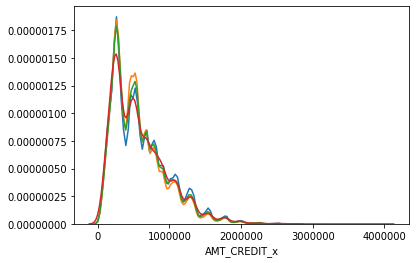

In [808]:
sns.distplot(appDataApproved['AMT_CREDIT_x'],hist=False)
sns.distplot(appDataRefused['AMT_CREDIT_x'],hist=False)
sns.distplot(appDataCanceled['AMT_CREDIT_x'],hist=False)
sns.distplot(appDataUnusedOffer['AMT_CREDIT_x'],hist=False)

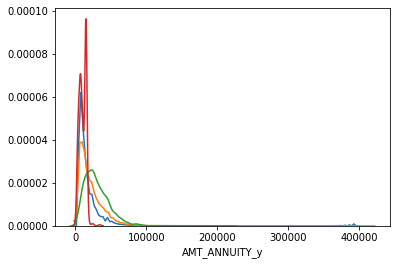

In [809]:
sns.distplot(appDataApproved['AMT_ANNUITY_y'],hist=False)
sns.distplot(appDataRefused['AMT_ANNUITY_y'],hist=False)
sns.distplot(appDataCanceled['AMT_ANNUITY_y'],hist=False)
sns.distplot(appDataUnusedOffer['AMT_ANNUITY_y'],hist=False)

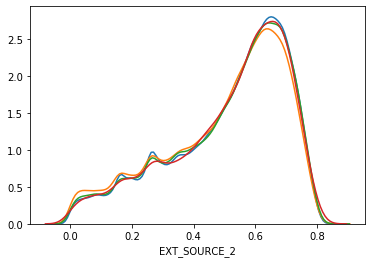

In [810]:
sns.distplot(appDataApproved['EXT_SOURCE_2'],hist=False)
sns.distplot(appDataRefused['EXT_SOURCE_2'],hist=False)
sns.distplot(appDataCanceled['EXT_SOURCE_2'],hist=False)
sns.distplot(appDataUnusedOffer['EXT_SOURCE_2'],hist=False)

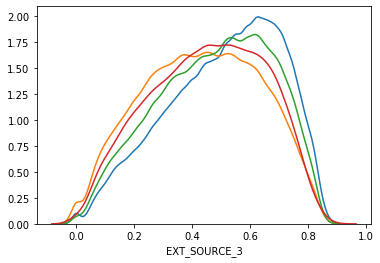

In [811]:
sns.distplot(appDataApproved['EXT_SOURCE_3'],hist=False)
sns.distplot(appDataRefused['EXT_SOURCE_3'],hist=False)
sns.distplot(appDataCanceled['EXT_SOURCE_3'],hist=False)
sns.distplot(appDataUnusedOffer['EXT_SOURCE_3'],hist=False)

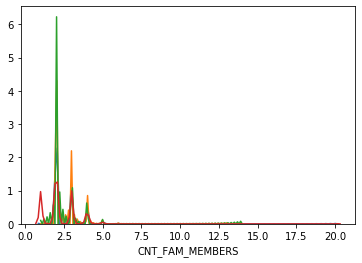

In [812]:
sns.distplot(appDataApproved['CNT_FAM_MEMBERS'],hist=False)
sns.distplot(appDataRefused['CNT_FAM_MEMBERS'],hist=False)
sns.distplot(appDataCanceled['CNT_FAM_MEMBERS'],hist=False)
sns.distplot(appDataUnusedOffer['CNT_FAM_MEMBERS'],hist=False)

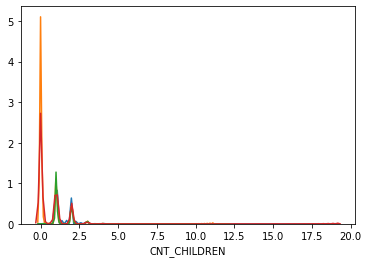

In [813]:
sns.distplot(appDataApproved['CNT_CHILDREN'],hist=False)
sns.distplot(appDataRefused['CNT_CHILDREN'],hist=False)
sns.distplot(appDataCanceled['CNT_CHILDREN'],hist=False)
sns.distplot(appDataUnusedOffer['CNT_CHILDREN'],hist=False)

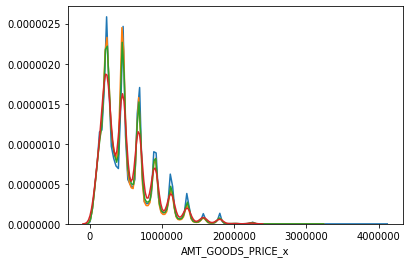

In [814]:
sns.distplot(appDataApproved['AMT_GOODS_PRICE_x'],hist=False)
sns.distplot(appDataRefused['AMT_GOODS_PRICE_x'],hist=False)
sns.distplot(appDataCanceled['AMT_GOODS_PRICE_x'],hist=False)
sns.distplot(appDataUnusedOffer['AMT_GOODS_PRICE_x'],hist=False)

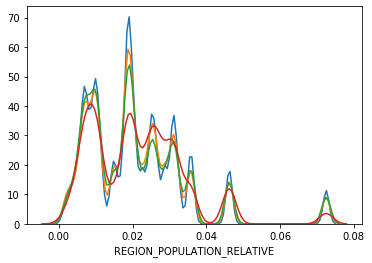

In [815]:
sns.distplot(appDataApproved['REGION_POPULATION_RELATIVE'],hist=False)
sns.distplot(appDataRefused['REGION_POPULATION_RELATIVE'],hist=False)
sns.distplot(appDataCanceled['REGION_POPULATION_RELATIVE'],hist=False)
sns.distplot(appDataUnusedOffer['REGION_POPULATION_RELATIVE'],hist=False)

#### OBSERVATIONS

Following parameters DO NOT show drastic behavior change across Loan Application which were Approved, Refused, Cancelled or Unused Offer:<br>
<b>> </b> AMT_CREDIT<br>
<b>> </b> AMT_ANNUITY<br>
<b>> </b> EXT_SOURCE_3<br>
<b>> </b> EXT_SOURCE_2<br>
<b>> </b> REGION_POPULATION_RELATIVE

#### BIVARIATE ANALYSIS

###### CONTINUOUS COLUMNS WITH RESPECT TO NAME_CONTRACT_STATUS

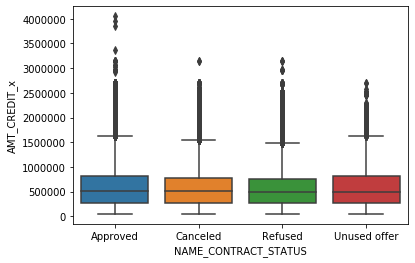

In [816]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_x")

In [817]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT_x"].mean()

NAME_CONTRACT_STATUS
Approved        596632.832120
Canceled        580558.129043
Refused         562459.150401
Unused offer    584384.800536
Name: AMT_CREDIT_x, dtype: float64

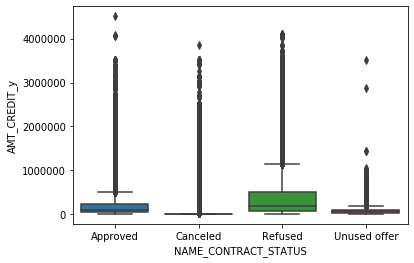

In [818]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_y")

In [819]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT_y"].mean()

NAME_CONTRACT_STATUS
Approved        201625.606822
Canceled         24784.712233
Refused         370460.065078
Unused offer     69753.576811
Name: AMT_CREDIT_y, dtype: float64

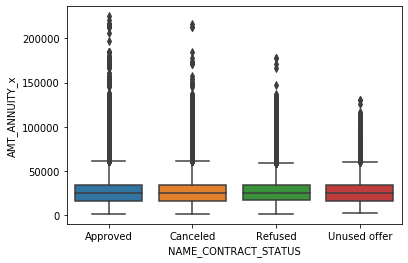

In [820]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_x")

In [821]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY_x"].mean()

NAME_CONTRACT_STATUS
Approved        27041.821509
Canceled        27063.492913
Refused         26892.170905
Unused offer    26867.578261
Name: AMT_ANNUITY_x, dtype: float64

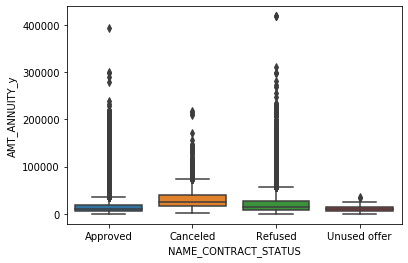

In [822]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_y")

In [823]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY_y"].mean()

NAME_CONTRACT_STATUS
Approved        14612.963875
Canceled        30189.937993
Refused         20406.646747
Unused offer    10192.875230
Name: AMT_ANNUITY_y, dtype: float64

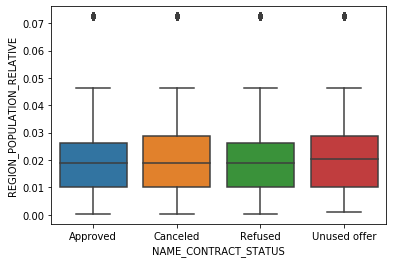

In [824]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="REGION_POPULATION_RELATIVE")

In [825]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["REGION_POPULATION_RELATIVE"].mean()

NAME_CONTRACT_STATUS
Approved        0.020705
Canceled        0.020797
Refused         0.020788
Unused offer    0.021548
Name: REGION_POPULATION_RELATIVE, dtype: float64

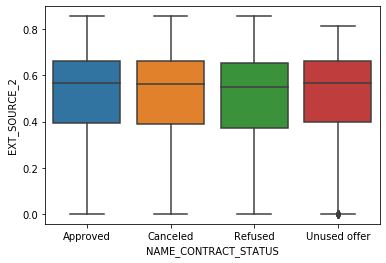

In [826]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="EXT_SOURCE_2")

In [827]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["EXT_SOURCE_2"].mean()

NAME_CONTRACT_STATUS
Approved        0.514362
Canceled        0.512573
Refused         0.499360
Unused offer    0.514266
Name: EXT_SOURCE_2, dtype: float64

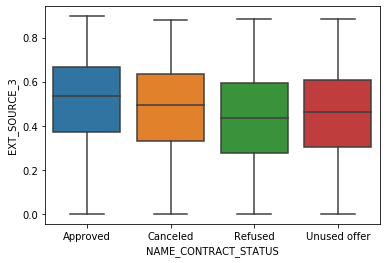

In [828]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="EXT_SOURCE_3")

In [829]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["EXT_SOURCE_3"].mean()

NAME_CONTRACT_STATUS
Approved        0.510413
Canceled        0.478154
Refused         0.432837
Unused offer    0.452167
Name: EXT_SOURCE_3, dtype: float64

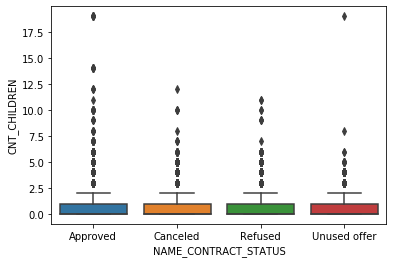

In [830]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="CNT_CHILDREN")

In [831]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["CNT_CHILDREN"].mean()

NAME_CONTRACT_STATUS
Approved        0.418164
Canceled        0.361851
Refused         0.390990
Unused offer    0.528699
Name: CNT_CHILDREN, dtype: float64

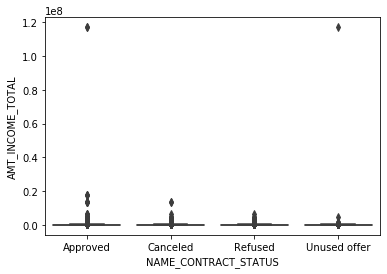

In [832]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL")

In [833]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["AMT_INCOME_TOTAL"].mean()

NAME_CONTRACT_STATUS
Approved        170334.255128
Canceled        177847.186003
Refused         178981.442404
Unused offer    176669.591085
Name: AMT_INCOME_TOTAL, dtype: float64

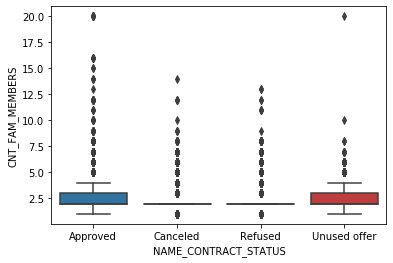

In [834]:
sns.boxplot(data=mergedAppData,x="NAME_CONTRACT_STATUS",y="CNT_FAM_MEMBERS")

In [835]:
mergedAppData.groupby("NAME_CONTRACT_STATUS")["CNT_FAM_MEMBERS"].mean()

NAME_CONTRACT_STATUS
Approved        2.167476
Canceled        2.107207
Refused         2.126118
Unused offer    2.246015
Name: CNT_FAM_MEMBERS, dtype: float64

#### OBSERVATIONS

The average of Credit Amount of previous application with respect to Refused Loan Application is significantly higher that other contract status<br>

Following variables are UNAFFECTED by contract status:<br>
<b>> </b> AMT_INCOME_TOTAL<br>
<b>> </b> CNT_CHILDREN<br>
<b>> </b> CNT_FAM_MEMBERS<br>
<b>> </b> EXT_SOURCES_2<br>
<b>> </b> EXT_SOURCES_3<br>
<b>> </b> REGION_POPULATION_RELATIVE

###### CATEGORICAL COLUMNS WITH RESPECT TO NAME_CONTRACT_STATUS

NAME_CONTRACT_STATUS
Approved        5.286758e+11
Canceled        1.506206e+11
Refused         1.380219e+11
Unused offer    1.330703e+10
Name: AMT_CREDIT_x, dtype: float64

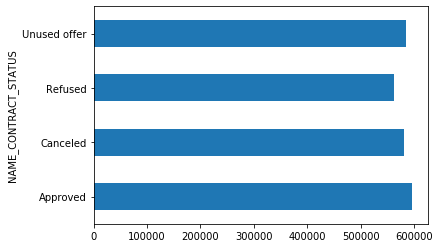

In [836]:
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_x'].mean().plot.barh()
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_x'].sum()

In [837]:
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_x'].mean()

NAME_CONTRACT_STATUS
Approved        596632.832120
Canceled        580558.129043
Refused         562459.150401
Unused offer    584384.800536
Name: AMT_CREDIT_x, dtype: float64

NAME_CONTRACT_STATUS
Approved        1.786600e+11
Canceled        6.430171e+09
Refused         9.090720e+10
Unused offer    1.588359e+09
Name: AMT_CREDIT_y, dtype: float64

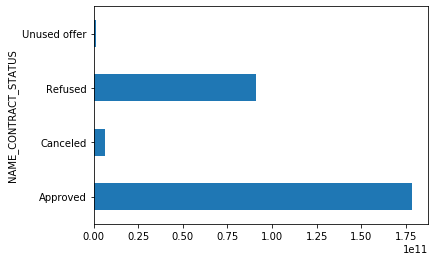

In [838]:
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT_y'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].sum()

In [839]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].mean()

NAME_CONTRACT_STATUS
Approved        201625.606822
Canceled         24784.712233
Refused         370460.065078
Unused offer     69753.576811
Name: AMT_CREDIT_y, dtype: float64

NAME_CONTRACT_STATUS
Approved        2.396049e+10
Canceled        7.020595e+09
Refused         6.598613e+09
Unused offer    6.117748e+08
Name: AMT_ANNUITY_x, dtype: float64

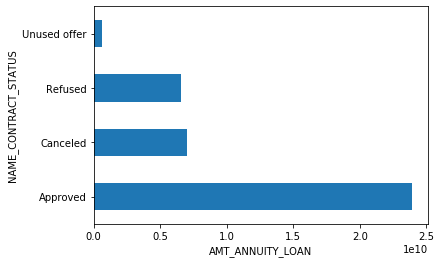

In [840]:
plt.xlabel("AMT_ANNUITY_LOAN")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_ANNUITY_x'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].sum()

In [841]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_x'].mean()

NAME_CONTRACT_STATUS
Approved        27041.821509
Canceled        27063.492913
Refused         26892.170905
Unused offer    26867.578261
Name: AMT_ANNUITY_x, dtype: float64

NAME_CONTRACT_STATUS
Approved        14612.963875
Canceled        30189.937993
Refused         20406.646747
Unused offer    10192.875230
Name: AMT_ANNUITY_y, dtype: float64

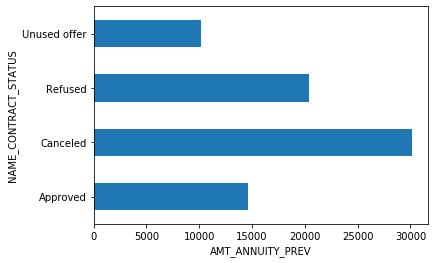

In [842]:
plt.xlabel("AMT_ANNUITY_PREV")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_ANNUITY_y'].mean().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY_y'].mean()

NAME_CONTRACT_STATUS
Approved        1920598.0
Canceled         546696.0
Refused          521728.0
Unused offer      51144.0
Name: CNT_FAM_MEMBERS, dtype: float64

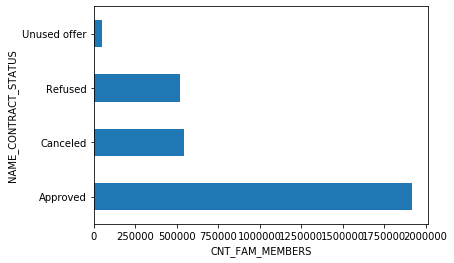

In [843]:
plt.xlabel("CNT_FAM_MEMBERS")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['CNT_FAM_MEMBERS'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['CNT_FAM_MEMBERS'].sum()

In [844]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['CNT_FAM_MEMBERS'].mean()

NAME_CONTRACT_STATUS
Approved        2.167476
Canceled        2.107207
Refused         2.126118
Unused offer    2.246015
Name: CNT_FAM_MEMBERS, dtype: float64

NAME_CONTRACT_STATUS
Approved        0.418164
Canceled        0.361851
Refused         0.390990
Unused offer    0.528699
Name: CNT_CHILDREN, dtype: float64

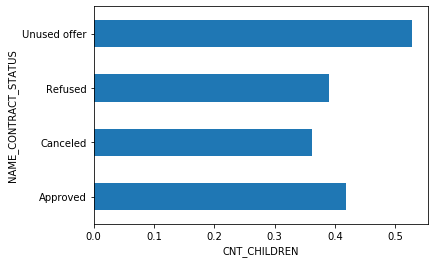

In [845]:
plt.xlabel("CNT_CHILDREN")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['CNT_CHILDREN'].mean().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['CNT_CHILDREN'].mean()

NAME_CONTRACT_STATUS
Approved        179499.196715
Canceled         23267.791267
Refused         330345.147967
Unused offer     69736.509972
Name: AMT_APPLICATION, dtype: float64

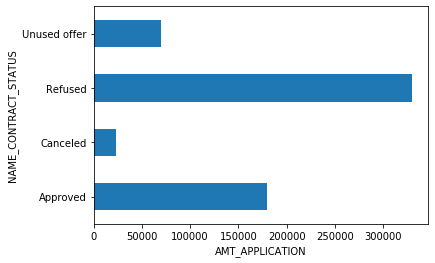

In [846]:
plt.xlabel("AMT_APPLICATION")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_APPLICATION'].mean().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].mean()

NAME_CONTRACT_STATUS
Approved       -1098.434711
Canceled        -221.505290
Refused         -789.075814
Unused offer    -885.116859
Name: DAYS_DECISION, dtype: float64

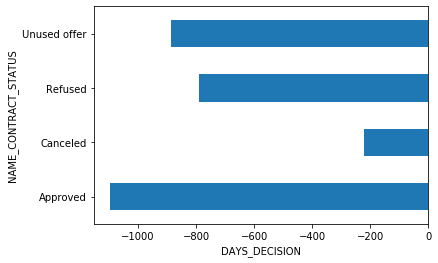

In [847]:
plt.xlabel("DAYS_DECISION")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['DAYS_DECISION'].mean().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['DAYS_DECISION'].mean()

NAME_CONTRACT_STATUS
Approved        12539021.0
Canceled          328402.0
Refused          4885942.0
Unused offer        7910.0
Name: CNT_PAYMENT, dtype: float64

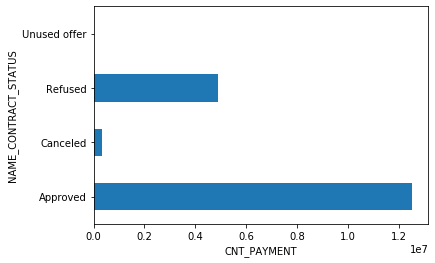

In [848]:
plt.xlabel("CNT_PAYMENT")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['CNT_PAYMENT'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['CNT_PAYMENT'].sum()

In [849]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['CNT_PAYMENT'].mean()

NAME_CONTRACT_STATUS
Approved        14.150861
Canceled        37.488813
Refused         23.172707
Unused offer    10.102171
Name: CNT_PAYMENT, dtype: float64

NAME_CONTRACT_STATUS
Approved        4.748121e+11
Canceled        1.349280e+11
Refused         1.236296e+11
Unused offer    1.202906e+10
Name: AMT_GOODS_PRICE_x, dtype: float64

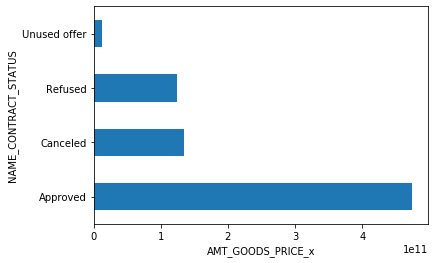

In [850]:
plt.xlabel("AMT_GOODS_PRICE_x")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_GOODS_PRICE_x'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE_x'].sum()

In [851]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE_x'].mean()

NAME_CONTRACT_STATUS
Approved        536293.326352
Canceled        520326.804351
Refused         504462.414882
Unused offer    528796.253978
Name: AMT_GOODS_PRICE_x, dtype: float64

NAME_CONTRACT_STATUS
Approved        187436.212283
Canceled        673429.164900
Refused         379200.305140
Unused offer     69748.762181
Name: AMT_GOODS_PRICE_y, dtype: float64

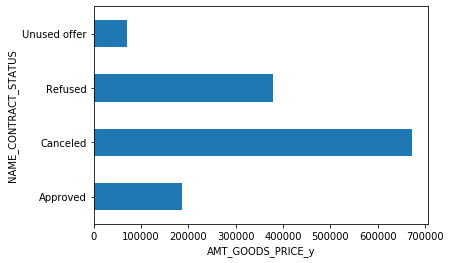

In [852]:
plt.xlabel("AMT_GOODS_PRICE_y")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['AMT_GOODS_PRICE_y'].mean().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE_y'].mean()

NAME_CONTRACT_STATUS
Approved        371995.233542
Canceled        102284.398080
Refused          90192.049569
Unused offer      9386.072227
Name: EXT_SOURCE_3, dtype: float64

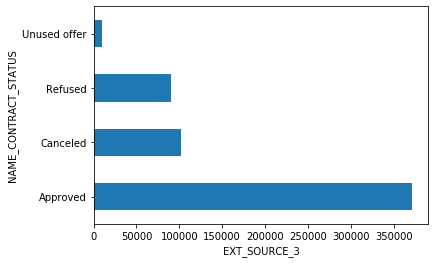

In [853]:
plt.xlabel("EXT_SOURCE_3")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['EXT_SOURCE_3'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['EXT_SOURCE_3'].sum()

In [854]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['EXT_SOURCE_3'].mean()

NAME_CONTRACT_STATUS
Approved        0.510413
Canceled        0.478154
Refused         0.432837
Unused offer    0.452167
Name: EXT_SOURCE_3, dtype: float64

NAME_CONTRACT_STATUS
Approved        455089.466064
Canceled        132893.295221
Refused         122399.162889
Unused offer     11692.356621
Name: EXT_SOURCE_2, dtype: float64

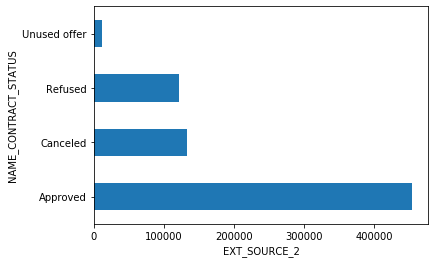

In [855]:
plt.xlabel("EXT_SOURCE_2")
mergedAppData.groupby(['NAME_CONTRACT_STATUS'])['EXT_SOURCE_2'].sum().plot.barh()
mergedAppData.groupby('NAME_CONTRACT_STATUS')['EXT_SOURCE_2'].sum()

In [856]:
mergedAppData.groupby('NAME_CONTRACT_STATUS')['EXT_SOURCE_2'].mean()

NAME_CONTRACT_STATUS
Approved        0.514362
Canceled        0.512573
Refused         0.499360
Unused offer    0.514266
Name: EXT_SOURCE_2, dtype: float64

#### OBSERVATIONS

<b>> </b> The amount credit by bank across contract status is not significantly ranging for current loan application as opposed to previous loan application where Approved and Refused average was higher.<br>
<b>> </b> The average payment made by client at equal intervals did not vary with contract status for current loan application however it was more for cancelled status in previous data. This is a remarkable driving factor for business to decide on AMT_ANNUITY.<br>
<b>> </b> Count of family member, external sources and goods price for consumer loan do not influence contract status essentially.<br>
<b>> </b> Term of previous credit of application for Cancelled Status is more than double of that of Approved Status.<br>
<b>> </b> Bank has clearly refused credit of higher amount of credit demand by client. There are some very small value credit amounts which are eventually cancelled.<br>
<b>> </b> Clients with children bearing have higher Approval Rate relatively.

### RECOMMENDATION

The driving factors which can be translated into business decisions for an incoming loan application of consumer finance company are stated briefly. Clearly some of the variables hold utter significance, therefore we have categorized into Leading Ones and couple of Secondary Considerations.

<b>Leading Variables</b><br><br>

FLAG_OWN_CAR<br>
FLAG_OWN_REALTY<br>
NAME_INCOME_TYPE<br>
NAME_CONTRACT_TYPE<br>
NAME_EDUCATION_TYPE<br>
NAME_HOUSING_TYPE<br>
CODE_GENDER<br>
NAME_FAMILY_STATUS<br>
NAME_CLIENT_TYPE<br>
CHANNEL_TYPE<br>

<b>Secondary considerations</b><br><br>
NAME_TYPE_SUITE<br>
EXT_SOURCE_2/3<br>
OCCUPATION_TYPE<br>
NAME_PAYMENT_TYPE<br>

We have performed Exploratory Data Analysis on the given data using Categorical and Continuous Variables with respect to two <b>key indicators</b><br>
<br> Target that would distinguish clients with payments difficulty and other cases<br>
 Contract type of client and company (Approved, Refused, Cancelled, Unused Offer)<br><br>
 The Univariate and Bivariate Analysis has demonstrated vivid insights on how the Leading Variables are key decision makers for processing a loan application and must be taken into account by consumer finance companies. There were certain surprising results and hints on how the figures make difference even when the loan applications are approved based on a certain criteria however later falls into bucket of clients with payments difficulty. <br>

The risk assessment for businesses to preserve clients at the same time refrain from financial losses while processing loan application is hereby concluded.<br>
